In [15]:
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from utils import utils

# Download NLTK stopwords if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\de130063\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\de130063\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Load dataset
df = pd.read_csv('../res/prepared/cryptonews.csv') # Replace with your file path
df = utils.Utils.balance_dataset(df, "label")

In [17]:
# Preprocessing function
def preprocess(text):
    tokenizer = utils.NLTKTokenizer()
    tokens = tokenizer.tokenize(text).split(" ")
    return tokens

# Convert text to average Word2Vec embeddings
def text_to_vector(text):
    words = preprocess(text)
    word_vectors = [word2vec[word] for word in words if word in word2vec]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(300)


In [18]:
# Load pretrained Word2Vec model (Google News)
word2vec = KeyedVectors.load_word2vec_format(r'../res\models\GoogleNews-vectors-negative300.bin', binary=True)

In [19]:
encoder = LabelEncoder()
X = np.array([text_to_vector(text) for text in df['text']])
y = encoder.fit_transform(df['label'])

In [20]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Support Vector Machine (SVM) classifier
model = SVC()
model.fit(X_train, y_train)

SVC()

In [21]:
# Predict and evaluate
y_cv = model.predict(X_test)

              precision    recall  f1-score   support

    negative       0.58      0.63      0.61       722
     neutral       0.62      0.65      0.63       765
    positive       0.65      0.57      0.61       805

    accuracy                           0.62      2292
   macro avg       0.62      0.62      0.62      2292
weighted avg       0.62      0.62      0.62      2292



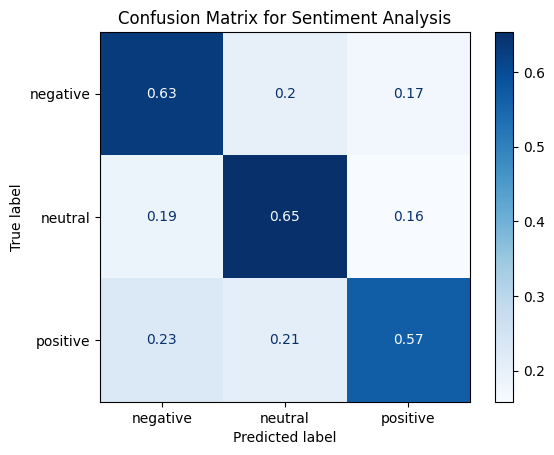

In [22]:
print(classification_report(y_test, y_cv, target_names=encoder.classes_))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_cv, normalize="true")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Sentiment Analysis")
plt.show()

In [23]:
df_cv = pd.read_csv('../res/prepared/indian_financial_news.csv') # Replace with your file path
X_cv = df_cv[["text"]]
y_cv = df_cv[["label"]]

In [24]:
X_cv = np.array([text_to_vector(text) for text in df_cv['text']])
y_cv = encoder.transform(df_cv['label'])    

In [25]:
# Predict on cross-validation data
y_cv_pred = model.predict(X_cv)

Cross-Validation Classification Report:
              precision    recall  f1-score   support

    negative       0.53      0.43      0.48      8987
     neutral       0.51      0.03      0.05      8987
    positive       0.39      0.83      0.53      8987

    accuracy                           0.43     26961
   macro avg       0.48      0.43      0.35     26961
weighted avg       0.48      0.43      0.35     26961



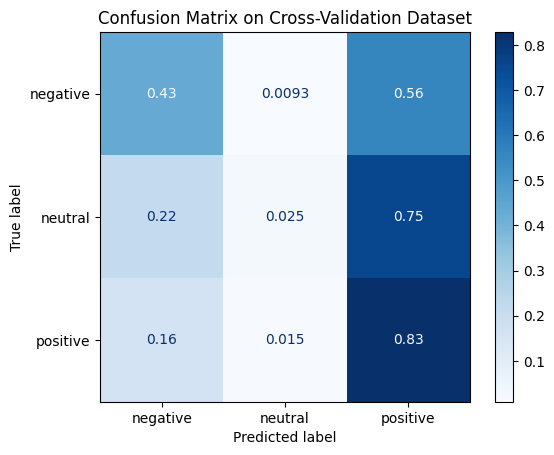

In [26]:
# Evaluation
print("Cross-Validation Classification Report:")
print(classification_report(y_cv, y_cv_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_cv, y_cv_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Cross-Validation Dataset")
plt.show()